In [1]:
import numpy as np
import io
import pandas as pd
import warnings
import statsmodels.api as sm
import itertools
from subprocess import check_output
from matplotlib.dates import DateFormatter

In [2]:
df1 = pd.read_csv('DJIA_table.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
df1.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [5]:
df1.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [6]:
df1.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609
1988,2008-08-08,11432.089844,11759.959961,11388.040039,11734.320312,212830000,11734.320312


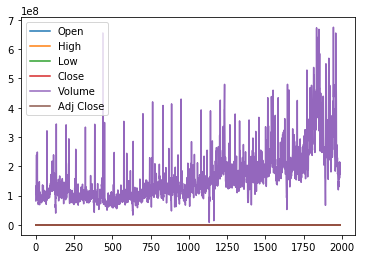

In [7]:
df1.plot.line()

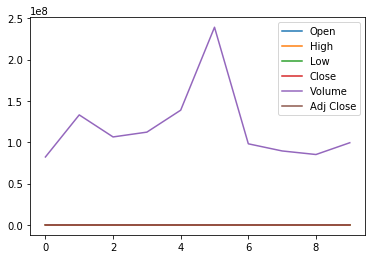

In [8]:
df1[:10].plot.line()

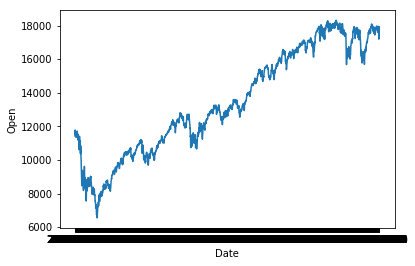

In [9]:
import seaborn as sns
sns.lineplot(x = "Date", y = "Open", data=df1)

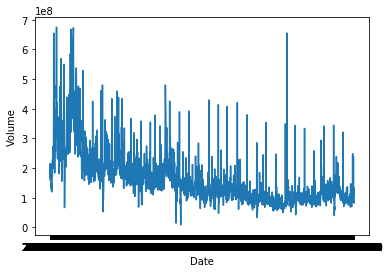

In [10]:
sns.lineplot(x = "Date", y = "Volume", data = df1)

In [11]:
df1.index

RangeIndex(start=0, stop=1989, step=1)

In [12]:
df1.set_index(df1['Date'], drop=True, append=False, inplace=True, verify_integrity=False)

In [13]:
data = df1.drop('Date', axis=1)

In [14]:
print(data)

                    Open          High           Low         Close     Volume  \
Date                                                                            
2016-07-01  17924.240234  18002.380859  17916.910156  17949.369141   82160000   
2016-06-30  17712.759766  17930.609375  17711.800781  17929.990234  133030000   
2016-06-29  17456.019531  17704.509766  17456.019531  17694.679688  106380000   
2016-06-28  17190.509766  17409.720703  17190.509766  17409.720703  112190000   
2016-06-27  17355.210938  17355.210938  17063.080078  17140.240234  138740000   
2016-06-24  17946.630859  17946.630859  17356.339844  17400.750000  239000000   
2016-06-23  17844.109375  18011.070312  17844.109375  18011.070312   98070000   
2016-06-22  17832.669922  17920.160156  17770.359375  17780.830078   89440000   
2016-06-21  17827.330078  17877.839844  17799.800781  17829.730469   85130000   
2016-06-20  17736.869141  17946.359375  17736.869141  17804.869141   99380000   
2016-06-17  17733.439453  17

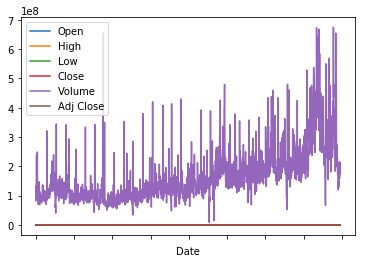

In [15]:
data.plot()

In [16]:
close = data.drop(['Open', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)

In [17]:
print(close)

                   Close
Date                    
2016-07-01  17949.369141
2016-06-30  17929.990234
2016-06-29  17694.679688
2016-06-28  17409.720703
2016-06-27  17140.240234
2016-06-24  17400.750000
2016-06-23  18011.070312
2016-06-22  17780.830078
2016-06-21  17829.730469
2016-06-20  17804.869141
2016-06-17  17675.160156
2016-06-16  17733.099609
2016-06-15  17640.169922
2016-06-14  17674.820312
2016-06-13  17732.480469
2016-06-10  17865.339844
2016-06-09  17985.189453
2016-06-08  18005.050781
2016-06-07  17938.279297
2016-06-06  17920.330078
2016-06-03  17807.060547
2016-06-02  17838.560547
2016-06-01  17789.669922
2016-05-31  17787.199219
2016-05-27  17873.220703
2016-05-26  17828.289062
2016-05-25  17851.509766
2016-05-24  17706.050781
2016-05-23  17492.929688
2016-05-20  17500.939453
...                  ...
2008-09-19  11388.440430
2008-09-18  11019.690430
2008-09-17  10609.660156
2008-09-16  11059.019531
2008-09-15  10917.509766
2008-09-12  11421.990234
2008-09-11  11433.709961


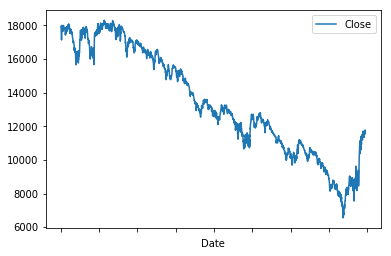

In [18]:
close.plot()

In [19]:
Open = data.drop(['Close', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)

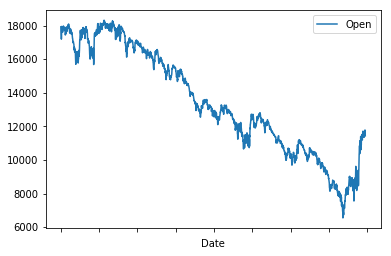

In [20]:
Open.plot()

In [21]:
High = data.drop(['Open', 'Close', 'Low', 'Volume', 'Adj Close'], axis=1)

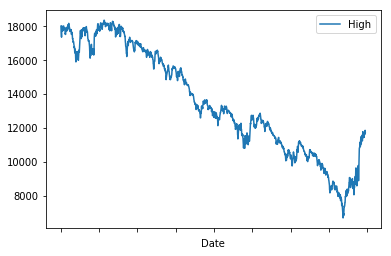

In [22]:
High.plot()

In [23]:
Low = df1.drop(['Open', 'High', 'Close', 'Volume', 'Adj Close'], axis=1)

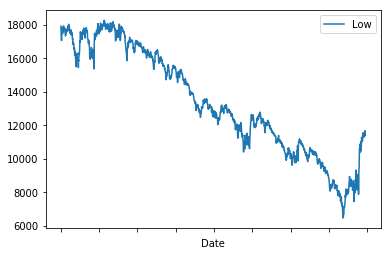

In [24]:
Low.plot()

In [25]:
Volume = data.drop(['Open', 'High', 'Low', 'Close', 'Adj Close'], axis=1)

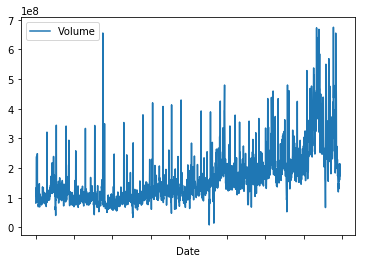

In [26]:
Volume.plot()

In [27]:
Adj_close = data.drop(['Open', 'High', 'Low', 'Volume', 'Close'], axis=1)

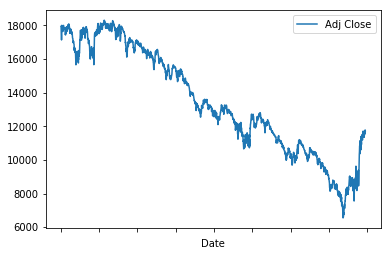

In [28]:
Adj_close.plot()

In [29]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [30]:
Stock = close.apply(lambda x: np.log(x) - np.log(x.shift(1)))

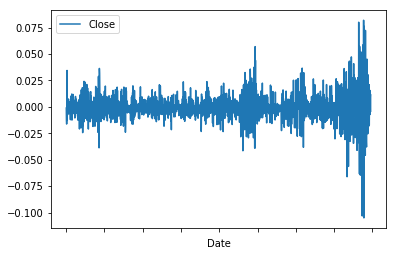

In [31]:
Stock.plot()

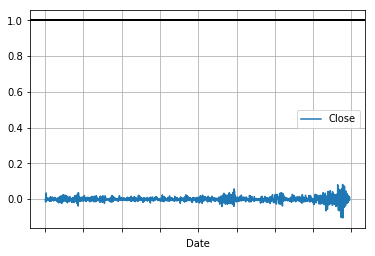

In [32]:
Stock.plot(grid = True).axhline(y = 1, color = "black", lw = 2)

In [33]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
print('start')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(close,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('done')

start
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:43551.15287002773
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:41852.30860727658
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:29607.92324921419
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:29431.02795644118
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:29601.83940969571
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:29587.934220191943
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:29445.317637872275
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:29432.969993377486
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:42060.03849778172
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:41441.895290329376
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:27997.278767295644
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:27772.80020833876
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:28020.47129328986
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:28698.842451028104
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:27808.19793798573
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:27774.731784374242
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:25374.313060832174
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:25198.41749829

In [49]:
mod = sm.tsa.statespace.SARIMAX(close,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3333      0.145      2.301      0.021       0.049       0.617
ma.L1         -0.4131      0.141     -2.937      0.003      -0.689      -0.137
ar.S.L12       0.0235      0.016      1.498      0.134      -0.007       0.054
ma.S.L12      -0.9912      0.012    -83.281      0.000      -1.015      -0.968
sigma2      2.035e+04    415.887     48.924      0.000    1.95e+04    2.12e+04


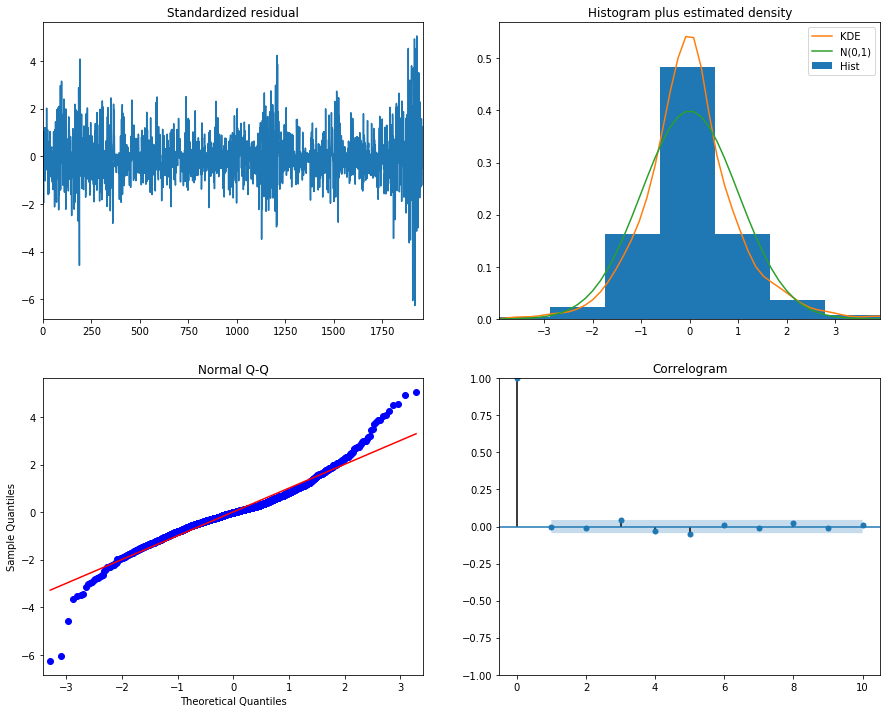

In [36]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [47]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
print('start')
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Stock,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
print('done')

start
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:-11733.573192561078
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:-11664.513265160298
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-10338.995067481246
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-11543.355559306474
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-11656.470996297598
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-11662.536355021919
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-10800.253135989142
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-11537.88500808357
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:-11747.896427728765
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-11679.252690500984
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-10353.705806955426
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-11557.0074316801
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-11690.687083393213
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-11677.690765759005
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-10823.691731314842
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-11552.27251116946
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-10158.414547611683
ARIMA(0, 1, 0)x(0, 0, 1, 12)1

In [51]:
mod = sm.tsa.statespace.SARIMAX(Stock,
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results2 = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3333      0.145      2.301      0.021       0.049       0.617
ma.L1         -0.4131      0.141     -2.937      0.003      -0.689      -0.137
ar.S.L12       0.0235      0.016      1.498      0.134      -0.007       0.054
ma.S.L12      -0.9912      0.012    -83.281      0.000      -1.015      -0.968
sigma2      2.035e+04    415.887     48.924      0.000    1.95e+04    2.12e+04


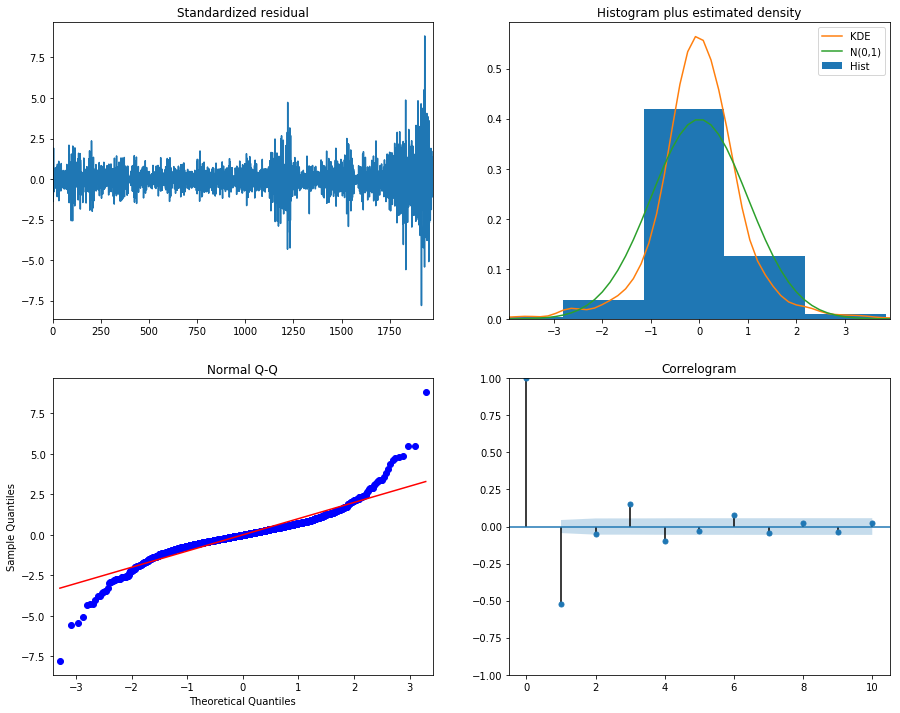

In [52]:
results2.plot_diagnostics(figsize=(15, 12))
plt.show()

In [69]:
pred = results.get_prediction(start=1, dynamic=False)
pred_ci = pred.conf_int()

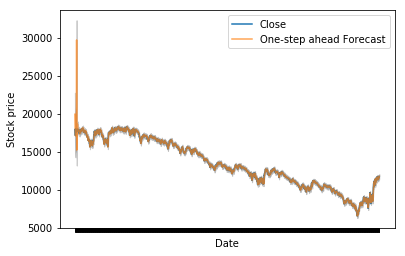

In [70]:
ax = close[1:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Stock price')
plt.legend()

plt.show()